# TeleChurn is a Python-based data analysis and machine learning project designed to analyze telecom customer data, with a specific focus on predicting customer churn. The project involves data wrangling, exploratory data analysis (EDA), customer segmentation, and churn prediction using machine learning models like Logistic Regression.

The program simulates a telecom customer base, generates synthetic data, and provides insights into customer behavior. It predicts the likelihood of churn based on key features such as service type, usage minutes, data usage, monthly bill, and demographics

First install all necessary packages in cmd : pip install pandas numpy faker matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans


In [ ]:
np.random.seed(42)

def generate_telecom_data(num_samples=1000):
    customer_ids = [f"CUST{i}" for i in range(1, num_samples+1)]
    genders = np.random.choice(['Male', 'Female'], num_samples)
    ages = np.random.randint(18, 80, num_samples)
    regions = np.random.choice(['North', 'South', 'East', 'West'], num_samples)
    service_types = np.random.choice(['Prepaid', 'Postpaid', 'Broadband'], num_samples)
    usage_minutes = np.random.normal(loc=350, scale=100, size=num_samples)
    data_usage = np.random.normal(loc=10, scale=2, size=num_samples)
    churned = np.random.choice([True, False], num_samples, p=[0.2, 0.8])
    monthly_bill = np.random.normal(loc=50, scale=10, size=num_samples)
    join_date = pd.to_datetime(np.random.choice(pd.date_range('2019-01-01', '2023-01-01', freq='D'), num_samples))

    df = pd.DataFrame({
        'customer_id': customer_ids,
        'gender': genders,
        'age': ages,
        'region': regions,
        'service_type': service_types,
        'usage_minutes': usage_minutes,
        'data_usage_gb': data_usage,
        'churned': churned,
        'monthly_bill': monthly_bill,
        'join_date': join_date
    })

    return df


df = generate_telecom_data(1000)
df.head()

,customer_id,gender,age,region,service_type,usage_minutes,data_usage_gb,churned,monthly_bill,join_date
0,CUST1,Male,71,East,Broadband,296.467181,10.735299,False,41.948282,2022-06-07
1,CUST2,Female,34,South,Prepaid,340.946672,5.799947,False,60.768481,2021-07-30
2,CUST3,Male,26,North,Broadband,383.198033,11.251016,False,28.303226,2019-09-06
3,CUST4,Male,50,South,Prepaid,369.049968,11.770463,False,38.058106,2022-06-23
4,CUST5,Male,70,South,Broadband,420.945182,8.815288,True,40.412215,2021-07-28


# **# ## Exploratory Data Analysis (EDA)**
## 1. Analyze churn distribution



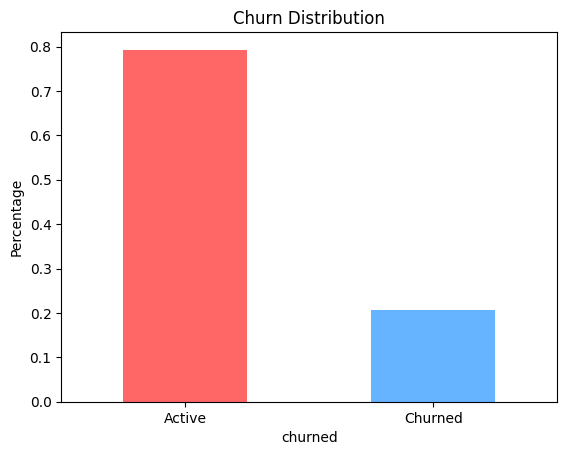

Churn rate: 20.70%


In [ ]:

churn_count = df['churned'].value_counts(normalize=True)
churn_count.plot(kind='bar', title='Churn Distribution', color=['#ff6666', '#66b3ff'])
plt.xticks([0, 1], ['Active', 'Churned'], rotation=0)
plt.ylabel('Percentage')
plt.show()

print(f"Churn rate: {churn_count[True] * 100:.2f}%")

## 2. Analyze average usage by service type

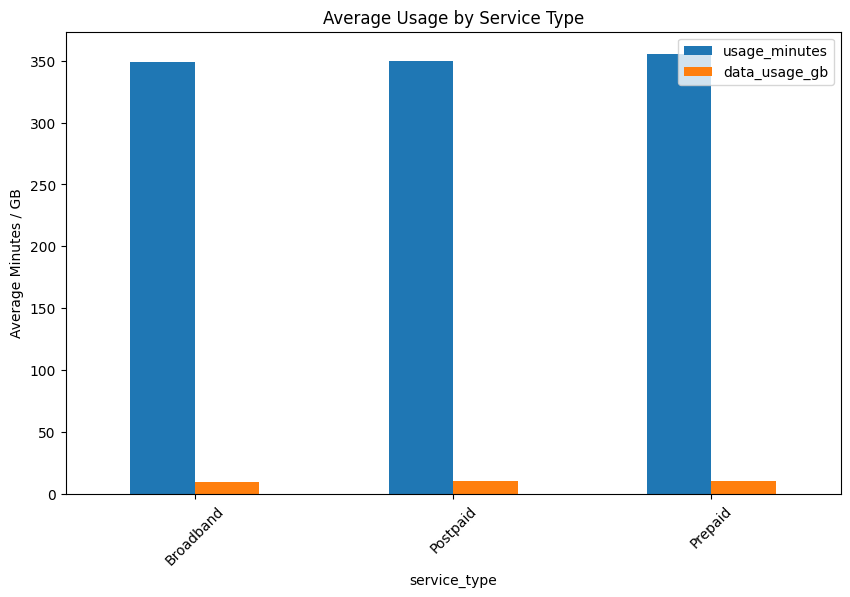

In [ ]:

usage_by_service = df.groupby('service_type')[['usage_minutes', 'data_usage_gb']].mean()
usage_by_service.plot(kind='bar', figsize=(10, 6), title='Average Usage by Service Type')
plt.ylabel('Average Minutes / GB')
plt.xticks(rotation=45)
plt.show()

## 3. Correlation matrix (for numeric features)

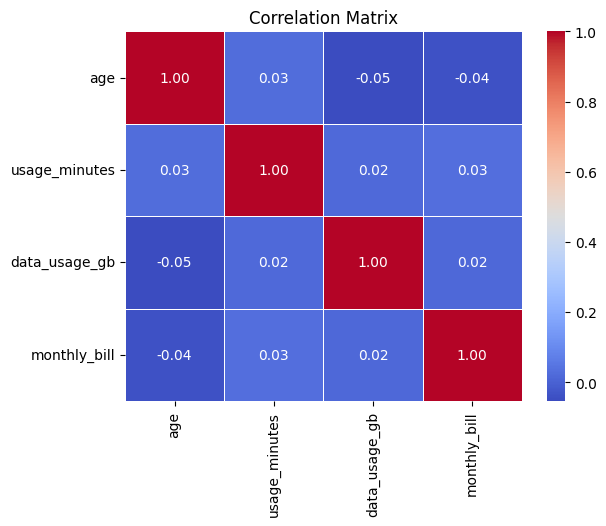

In [ ]:

corr = df[['age', 'usage_minutes', 'data_usage_gb', 'monthly_bill']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Churn Prediction using Logistic Regression

## 1. Data Preprocessing

In [ ]:

df_encoded = pd.get_dummies(df, columns=['gender', 'region', 'service_type'], drop_first=True)


X = df_encoded.drop(columns=['customer_id', 'churned', 'join_date'])
y = df['churned']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Build and Evaluate Logistic Regression Model



Accuracy: 84.50%


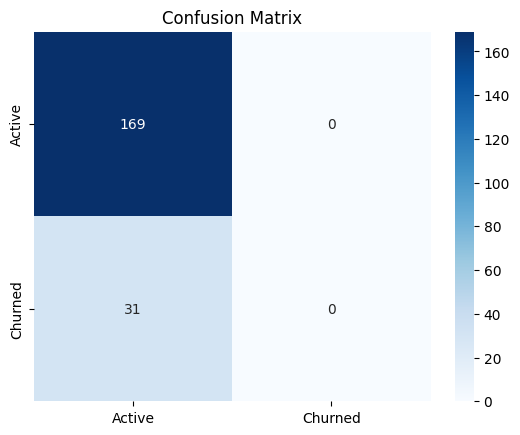

In [ ]:

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Active', 'Churned'], yticklabels=['Active', 'Churned'])
plt.title('Confusion Matrix')
plt.show()

# # # Customer Segmentation using K-Means Clustering
## 1. Perform K-Means Clustering on Usage

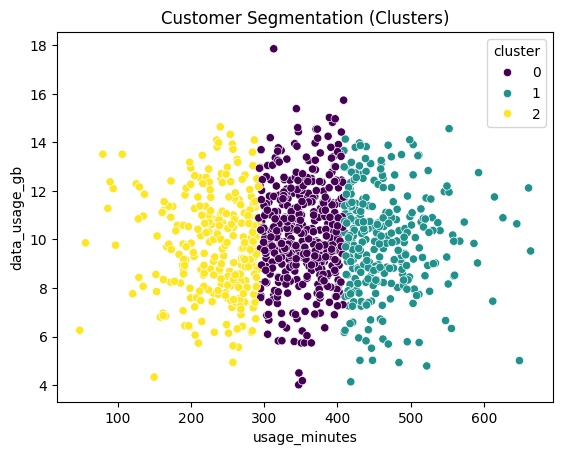

In [ ]:

X_clustering = df[['usage_minutes', 'data_usage_gb']]


kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_clustering)


sns.scatterplot(x='usage_minutes', y='data_usage_gb', hue='cluster', data=df, palette='viridis')
plt.title('Customer Segmentation (Clusters)')
plt.show()